In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
food_prod = pd.read_csv("/content/drive/My Drive/Hamoye/Africa Food Production (2004 - 2013).csv")
food_supply = pd.read_csv("/content/drive/My Drive/Hamoye/Africa Food Supply (2004 - 2013).csv")

In [ ]:
#Taking a look at the food production dataset
food_prod

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


In [ ]:
#Removing the rows that have zero production
prod_only= food_prod[food_prod["Value"]!=0]
prod_only

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23095,Zimbabwe,Freshwater Fish,2009,13
23096,Zimbabwe,Freshwater Fish,2010,13
23097,Zimbabwe,Freshwater Fish,2011,18
23098,Zimbabwe,Freshwater Fish,2012,18


In [ ]:
prod_country = prod_only.drop(["Year", "Item"], axis=1)
prod_country

,Country,Value
0,Algeria,2731
1,Algeria,2415
2,Algeria,2688
3,Algeria,2319
4,Algeria,1111
...,...,...
23095,Zimbabwe,13
23096,Zimbabwe,13
23097,Zimbabwe,18
23098,Zimbabwe,18


In [ ]:
country = prod_country.groupby("Country")


In [ ]:
sorted_countries = country.sum().sort_values('Value',ascending=False)

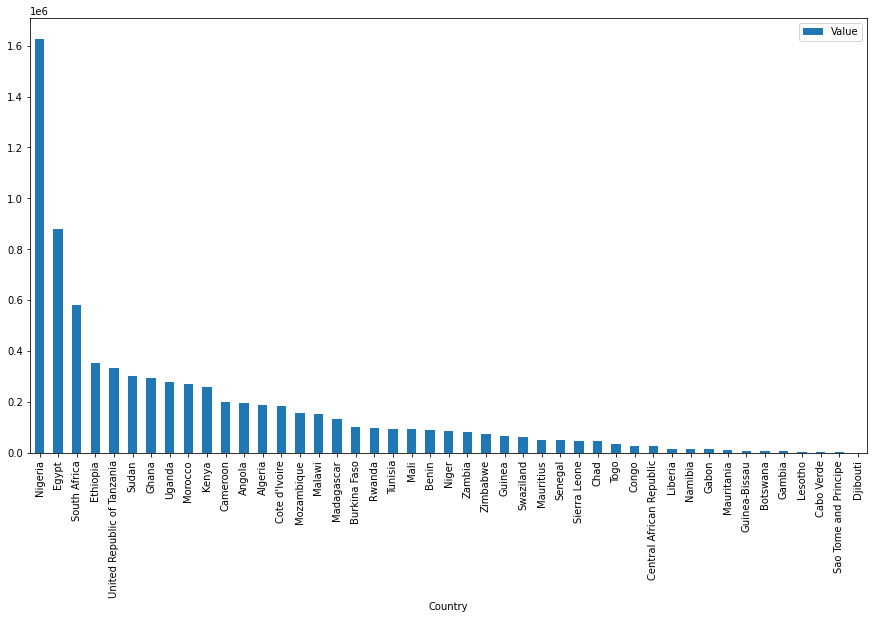

In [ ]:
#Barchart showig the countries and their amount produced in metric kilotons
sorted_countries.plot(kind='bar',figsize=(15,8))

In [ ]:
#Top 5 Producing countries
country.sum().sort_values('Value',ascending=False).head()

,Value
Country,
Nigeria,1628030
Egypt,877498
South Africa,579592
Ethiopia,350693
United Republic of Tanzania,332802


In [ ]:
#Bottom 5 producing countries
country.sum().sort_values('Value',ascending=False).tail()

,Value
Country,
Gambia,4699
Lesotho,3785
Cabo Verde,1658
Sao Tome and Principe,1152
Djibouti,666


In [ ]:
prod_item = prod_only.drop(["Year", "Country"], axis=1)
prod_item

,Item,Value
0,Wheat and products,2731
1,Wheat and products,2415
2,Wheat and products,2688
3,Wheat and products,2319
4,Wheat and products,1111
...,...,...
23095,Freshwater Fish,13
23096,Freshwater Fish,13
23097,Freshwater Fish,18
23098,Freshwater Fish,18


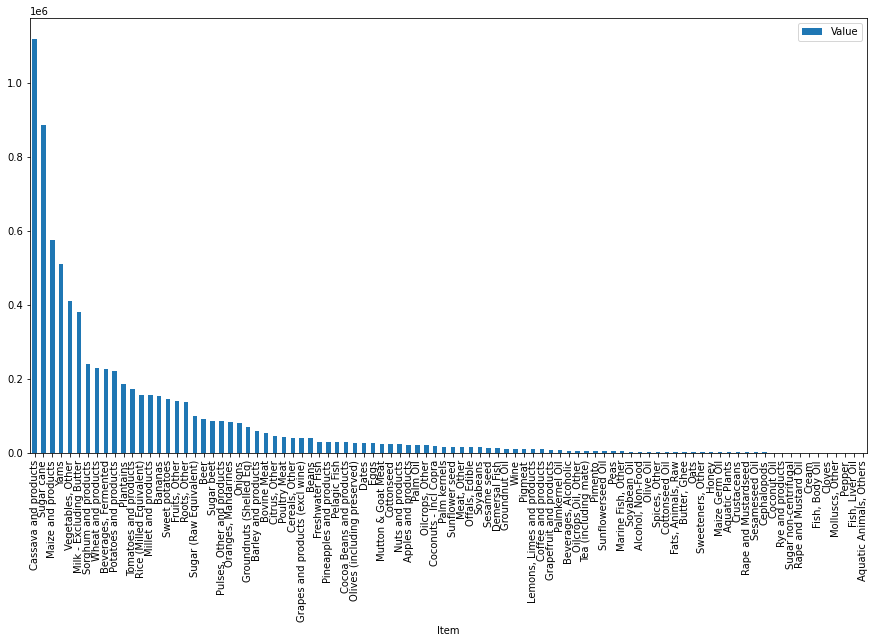

In [ ]:
#Barchart showing Items and the amount produced in metric kilotons
items = prod_item.groupby("Item")
sorted_items = items.sum().sort_values('Value',ascending=False)
sorted_items.plot(kind='bar',figsize=(15,8))

In [ ]:
#Top 5 items produced
items.sum().sort_values('Value',ascending=False).head()

,Value
Item,
Cassava and products,1118948
Sugar cane,887008
Maize and products,574948
Yams,511523
"Vegetables, Other",410403


In [ ]:
#Bottom 5 items produced
items.sum().sort_values('Value',ascending=False).tail()

,Value
Item,
Cloves,249
"Molluscs, Other",214
Pepper,199
"Fish, Liver Oil",28
"Aquatic Animals, Others",13


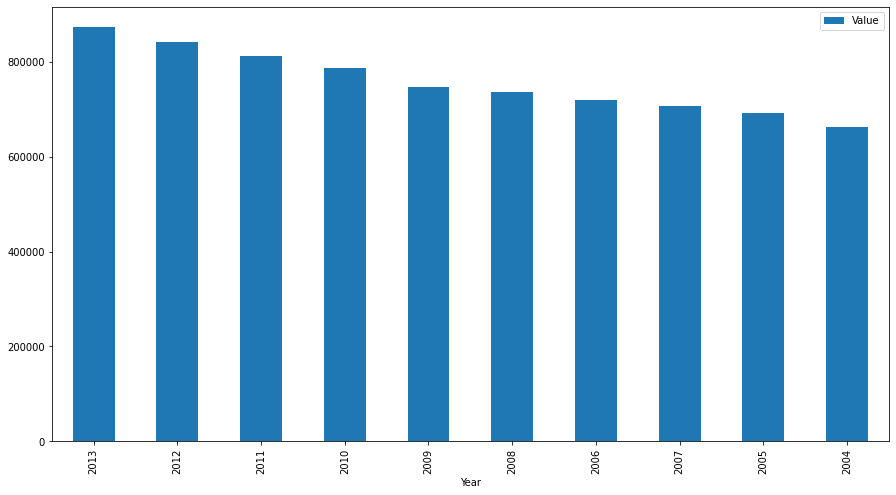

In [ ]:
#Barchart showing the amount of items produced ny metric kilotons across the years 2004-2013
prod_year = prod_only.drop(["Item", "Country"], axis=1)
years = prod_year.groupby("Year")
sorted_years = years.sum().sort_values('Value',ascending=False)
sorted_years.plot(kind='bar',figsize=(15,8))

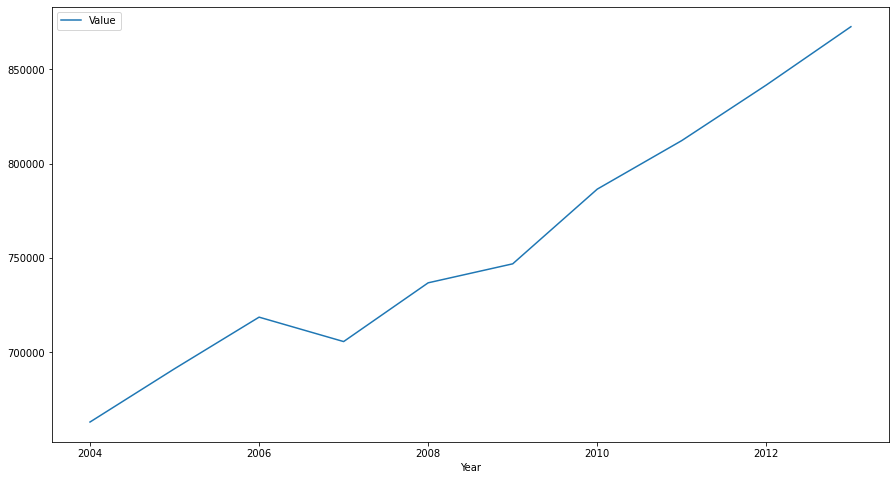

In [ ]:
#Line chart showing the trend in food production over the years
years.sum().plot(figsize=(15,8))

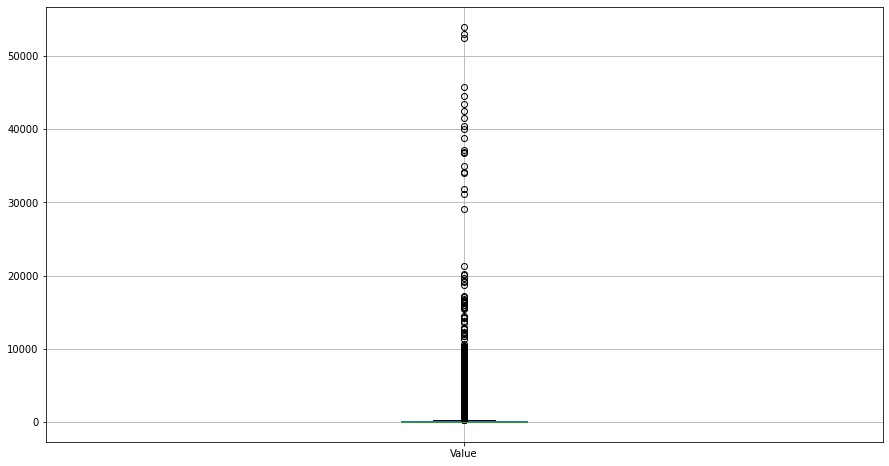

In [ ]:
prod_country.boxplot(figsize=(15,8))

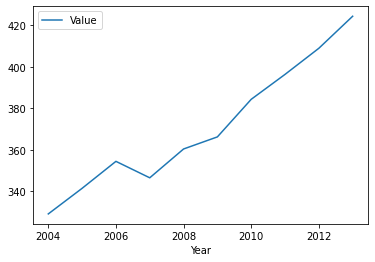

In [ ]:
years.mean().plot()

In [ ]:
food_supply

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


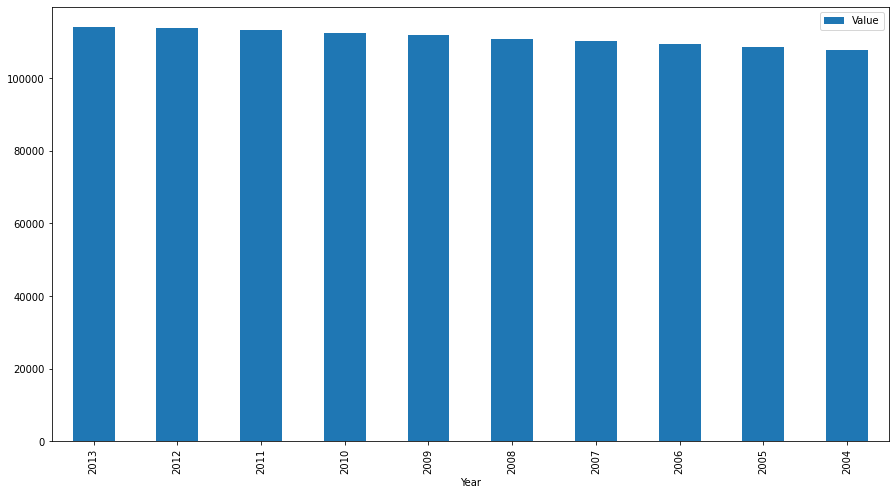

In [ ]:
supply_year = food_supply.drop("Country", axis=1)
years_s = supply_year.groupby("Year")
sorted_years_s = years_s.sum().sort_values('Value',ascending=False)
sorted_years_s.plot(kind='bar',figsize=(15,8))

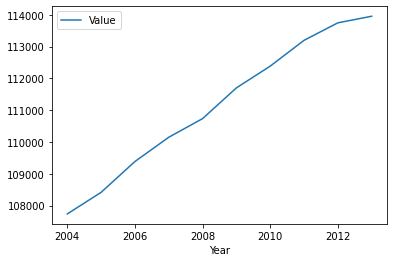

In [ ]:
years_s.sum().plot()

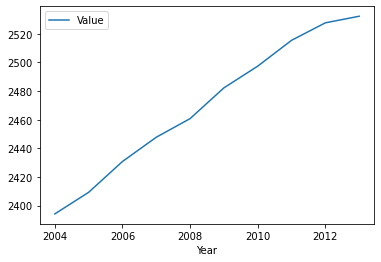

In [ ]:
years_s.mean().plot()

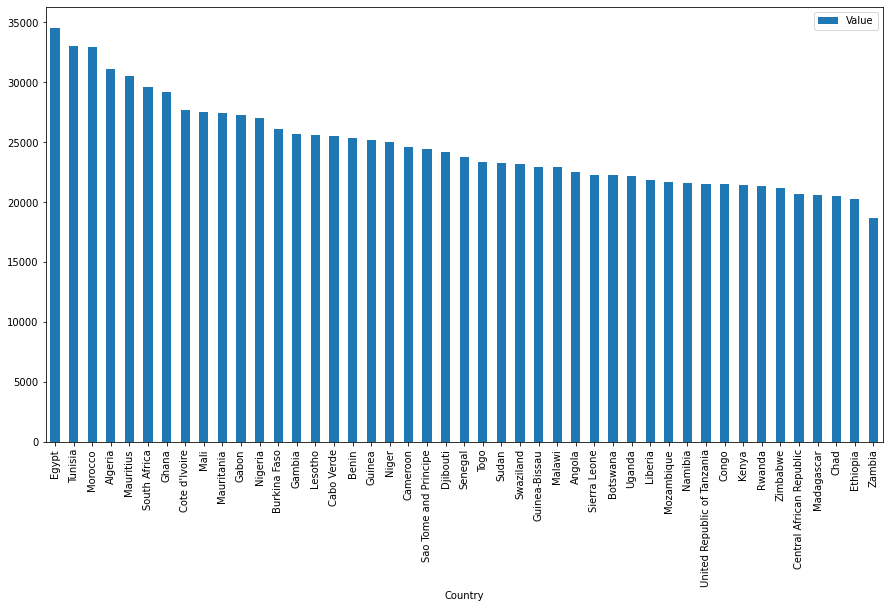

In [ ]:
#Barchart showing distribution of items supplied across countries
supply_country = food_supply.drop("Year", axis=1)
country_s = supply_country.groupby("Country")
sorted_country_s = country_s.sum().sort_values('Value',ascending=False)
sorted_country_s.plot(kind='bar',figsize=(15,8))

In [ ]:
#Top suppliers by country
country_s.sum().sort_values('Value',ascending=False).head()

,Value
Country,
Egypt,34580
Tunisia,33055
Morocco,32967
Algeria,31118
Mauritius,30543


In [ ]:
#Bottom suplliers by Country
country_s.sum().sort_values('Value',ascending=False).tail()

,Value
Country,
Central African Republic,20719
Madagascar,20608
Chad,20511
Ethiopia,20292
Zambia,18701


In [ ]:
years_s.mean()

,Value
Year,
2004,2394.222222
2005,2409.288889
2006,2430.800000
2007,2447.755556
2008,2460.755556
2009,2482.222222
2010,2497.400000
2011,2515.422222
2012,2527.644444


In [ ]:
years.mean()

,Value
Year,
2004,329.198610
2005,341.530138
2006,354.515047
2007,346.590864
2008,360.471624
2009,366.292300
2010,384.391984
2011,396.395315
2012,408.973275


In [ ]:
prod_only["Value"].median()

27.0

In [ ]:
prod_only["Value"].describe()

count    20393.000000
mean       371.456676
std       1706.966252
min          1.000000
25%          6.000000
50%         27.000000
75%        141.000000
max      54000.000000
Name: Value, dtype: float64

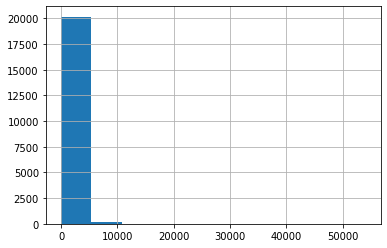

In [ ]:
prod_only["Value"].hist(bins = 10)

In [ ]:
mean_prod = years.mean()
mean_supply = years_s.mean()

(0.0, 300.0)

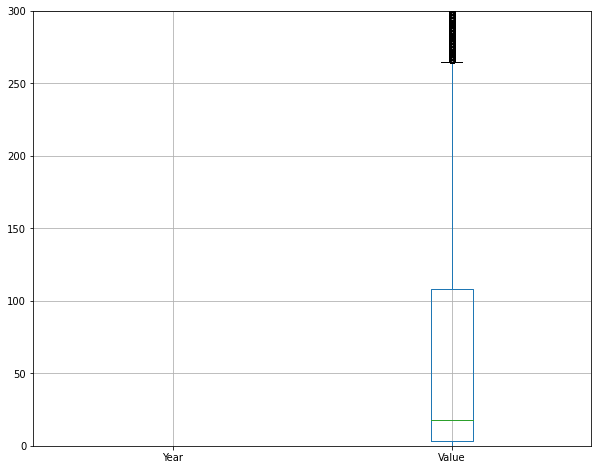

In [ ]:
food_prod.boxplot(figsize=(10,8))
plt.ylim(0,300)

In [ ]:
q1 = food_prod.Value.quantile(q=0.25)
q3 = food_prod.Value.quantile(q=0.75)
iqr = q3-q1
lb = q1-(1.5*iqr)
ub = q3+(1.5*iqr)
food_prod[(food_prod.Value>0)&(food_prod.Value<=ub)].describe()

,Year,Value
count,16697.000000,16697.000000
mean,2008.486794,41.635803
std,2.869207,57.842153
min,2004.000000,1.000000
25%,2006.000000,4.000000
50%,2008.000000,16.000000
75%,2011.000000,51.000000
max,2013.000000,265.000000


In [ ]:
oats = food_prod[food_prod["Item"]=="Oats"]

In [ ]:
oats[oats["Year"]== 2010].sort_values("Value")

,Country,Item,Year,Value
7746,Ghana,Oats,2010,0
10026,Lesotho,Oats,2010,0
22516,Zimbabwe,Oats,2010,1
20056,Tunisia,Oats,2010,2
9286,Kenya,Oats,2010,3
17816,South Africa,Oats,2010,34
13186,Morocco,Oats,2010,37
6406,Ethiopia,Oats,2010,48
46,Algeria,Oats,2010,88


In [ ]:
low_food = food_supply[(food_supply["Year"] >= 2004) & (food_supply["Year"] <= 2006)]

In [ ]:
countries = low_food.drop("Year", axis = 1)

In [ ]:
countries = countries.groupby("Country")
countries.sum().sort_values("Value", ascending = True)

,Value
Country,
Zambia,5577
Ethiopia,5827
Central African Republic,6044
Rwanda,6050
Chad,6082
Madagascar,6123
Zimbabwe,6184
Mozambique,6208
Angola,6226


In [ ]:
rice = food_prod[food_prod["Item"]=="Rice (Milled Equivalent)"]

In [ ]:
rice = rice.drop(columns=["Item", "Year"], axis = 1)
rice

,Country,Value
10,Algeria,0
11,Algeria,0
12,Algeria,0
13,Algeria,0
14,Algeria,0
...,...,...
22485,Zimbabwe,0
22486,Zimbabwe,0
22487,Zimbabwe,0
22488,Zimbabwe,0


In [ ]:
rice = rice.groupby("Country")


AttributeError: ignored

In [ ]:
rice.sum().sort_values("Value")

,Value
Country,
Algeria,0
Swaziland,0
Mauritius,1
Zimbabwe,1
Congo,10
Gabon,10
South Africa,22
Angola,103
Sudan,170
